In [1]:
import pandas as pd
from datetime import datetime

import yfinance as yf

import talib as ta

import warnings
warnings.filterwarnings("ignore")

In [2]:
# portfolio of stocks
stocks = ['^GDAXI']

In [3]:

# Calculate dates properly
end_date = datetime.now()
start_date = end_date - pd.DateOffset(months=6)

# Convert to strings for yfinance if needed (yfinance accepts datetime objects too)
print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

# Download historical data from yf API
df = yf.download(stocks, start=start_date, end=end_date, group_by='ticker', interval='1h')

# # download data to csv
# df.to_csv("stocks_data.csv")

# # Load the CSV with MultiIndex columns (Tickers, OHLCV)
# df = pd.read_csv("stocks_data.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# # Show the result
# df.head()

Date range: 2025-03-11 to 2025-09-11


[*********************100%***********************]  1 of 1 completed


In [4]:
# drop level 0 of the columns MultiIndex (the tickers)
df.columns = df.columns.droplevel(0)

df.head()

Price,Open,High,Low,Close,Volume
Datetime,,,,,
2025-03-11 10:00:00+00:00,22771.179688,22777.140625,22688.339844,22716.589844,0.0
2025-03-11 11:00:00+00:00,22716.589844,22716.589844,22638.500000,22698.210938,0.0
2025-03-11 12:00:00+00:00,22698.210938,22701.470703,22603.199219,22664.910156,0.0
2025-03-11 13:00:00+00:00,22664.910156,22708.699219,22510.279297,22541.119141,0.0
2025-03-11 14:00:00+00:00,22541.439453,22603.119141,22258.380859,22341.570312,0.0


In [5]:
# calculate ATR for each stock
atr_period = 21

for stock in stocks:
    df[f'{stock}_ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=atr_period)

df.head()

Price,Open,High,Low,Close,Volume,^GDAXI_ATR
Datetime,,,,,,
2025-03-11 10:00:00+00:00,22771.179688,22777.140625,22688.339844,22716.589844,0.0,NaN
2025-03-11 11:00:00+00:00,22716.589844,22716.589844,22638.500000,22698.210938,0.0,NaN
2025-03-11 12:00:00+00:00,22698.210938,22701.470703,22603.199219,22664.910156,0.0,NaN
2025-03-11 13:00:00+00:00,22664.910156,22708.699219,22510.279297,22541.119141,0.0,NaN
2025-03-11 14:00:00+00:00,22541.439453,22603.119141,22258.380859,22341.570312,0.0,NaN


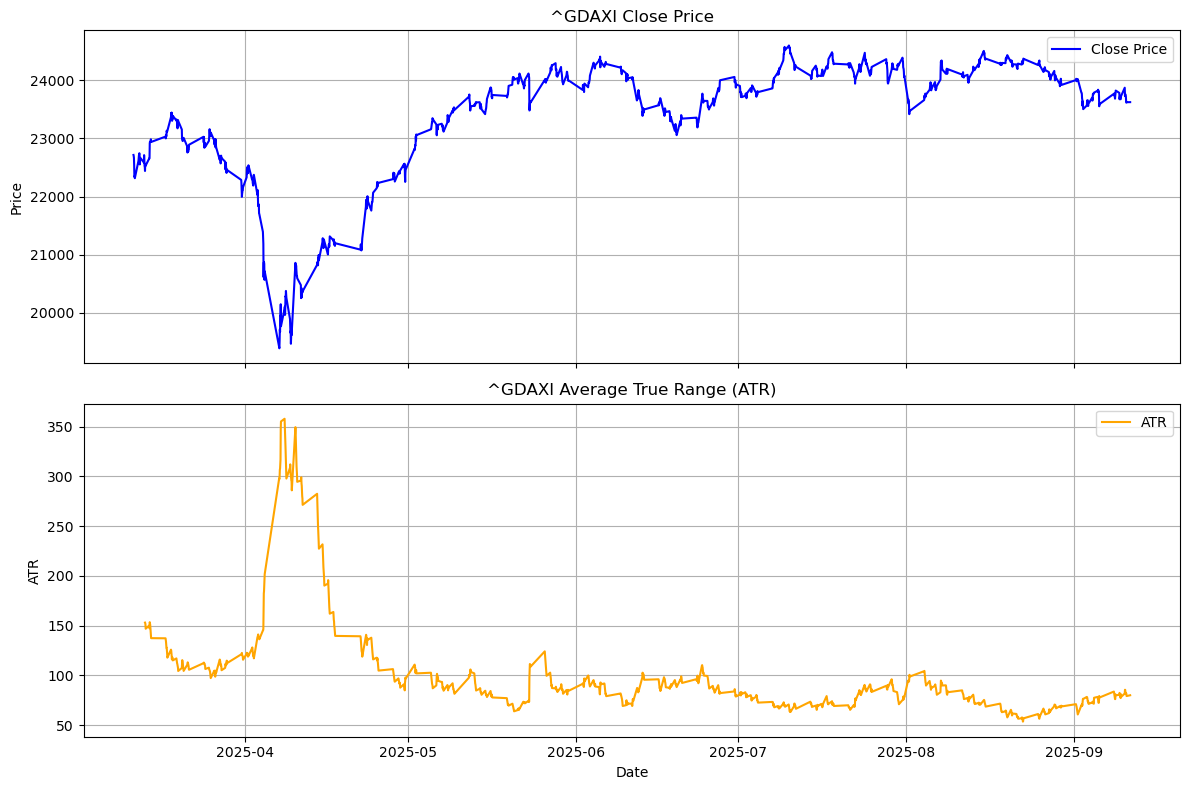

In [7]:
# plot the closing prices and ATR, in two separate plots
import matplotlib.pyplot as plt

for stock in stocks:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
    ax1.set_title(f'{stock} Close Price')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid()
    
    ax2.plot(df.index, df[f'{stock}_ATR'], label='ATR', color='orange')
    ax2.set_title(f'{stock} Average True Range (ATR)')
    ax2.set_ylabel('ATR')
    ax2.legend()
    ax2.grid()
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()